In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Grid World
## Value Iteration

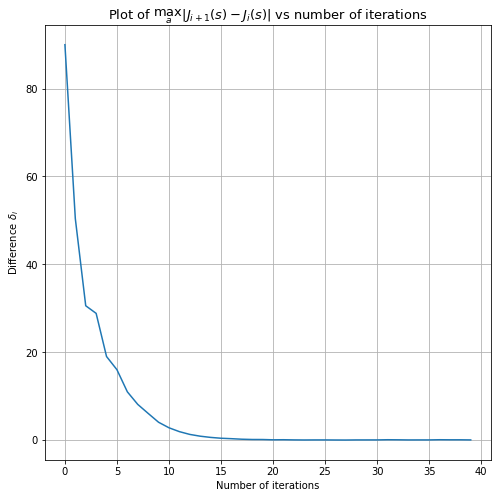

In [5]:
niter=40 # number of times the value iteration has to be performed
J=np.zeros((10,10)) # initialise J matrix with zeros for all states
JN=[] # contains the J matrix for each stage
JN.append(J)
goal=[0,9] # set the goal co-ordinate
up=np.zeros(np.shape(J))
left=np.zeros(np.shape(J))
down=np.zeros(np.shape(J))
right=np.zeros(np.shape(J))
actions_arr=[]
alpha = 0.7
p=np.array([0.8,0.2/3,0.2/3]) # transition probability for [direction,direction + 90, direction - 90]
J_temp=np.zeros((np.shape(J)[0]+2,np.shape(J)[0]+2))
J[goal[0]][goal[1]]=100
for i in range(niter):
    J_temp[1:-1,1:-1]=np.copy(J)
    
    up=alpha*(0.8*(J_temp[0:-2,1:-1])+(0.2/3)*(J_temp[1:-1,2:])+(0.2/3)*(J_temp[1:-1,0:-2]+(0.2/3)*(J_temp[2:,1:-1])))# up right left down.   
    right=alpha*(0.8*(J_temp[1:-1,2:])+(0.2/3)*(J_temp[2:,1:-1])+(0.2/3)*(J_temp[0:-2,1:-1])+(0.2/3)*(J_temp[1:-1,0:-2]))# right down up left
    down=alpha*(0.8*(J_temp[2:,1:-1])+(0.2/3)*(J_temp[1:-1,0:-2])+(0.2/3)*(J_temp[1:-1,2:]+(0.2/3)*(J_temp[0:-2,1:-1])))# down left right up
    left=alpha*(0.8*(J_temp[1:-1,0:-2])+(0.2/3)*(J_temp[0:-2,1:-1])+(0.2/3)*(J_temp[2:,1:-1]+(0.2/3)*(J_temp[1:-1,2:])))# left up down right
    
    cost=np.dstack((up,right))
    cost=np.dstack((cost,down))
    cost=np.dstack((cost,left))
    J=np.max(cost,axis=2)
    actions=np.argmax(cost,axis=2)
    J[goal[0]][goal[1]]=10 #goal cost is always 100
    
    #worm holes
    
    #gray wormholes
    gray_wormhole_arr=[J[3][2],J[4][2],J[5][2],J[6][2]]
    J[9][0]=np.random.choice(gray_wormhole_arr,1,p=[1/4,1/4,1/4,1/4]) 
    # Because for Gray wormhole IN we have 0.25 probab of getting in one of the OUT
    
    # Orange Wormhole
    J[0][7]=J[8][7]
    
    J_temp[:,0]=J_temp[:,1] #changing the left padding
    J_temp[:,-1]=J_temp[:,-2] #changing the right padding
    J_temp[0,1:-1]=J_temp[1,1:-1] #changing the upper padding
    J_temp[-1,1:-1]=J_temp[-2,1:-1] #changing the lower padding
    '''
    J_temp[0,:]=J_temp[1,:]
    J_temp[-1,:]=J_temp[-2,:]
    J_temp[1:-2,0]=J_temp[1:-2,1]
    J_temp[1:-2,-1]=J_temp[1:-2,-2]
    '''
    actions_arr.append(actions)
    JN.append(J) # to keep track of the evolution of J

max_arr=[]
for i in range(np.array(JN).shape[0]-1):
    J_i=JN[i]
    J_i_1=JN[i+1]
    max_arr.append(np.max(np.abs(J_i_1-J_i)))
    
plt.plot(max_arr)
plt.grid()
plt.title('Plot of $\max_a | J_{i+1}(s)-J_i(s)$| vs number of iterations',fontsize=13)
plt.xlabel('Number of iterations')
plt.ylabel('Difference $\delta_i$')
plt.show()

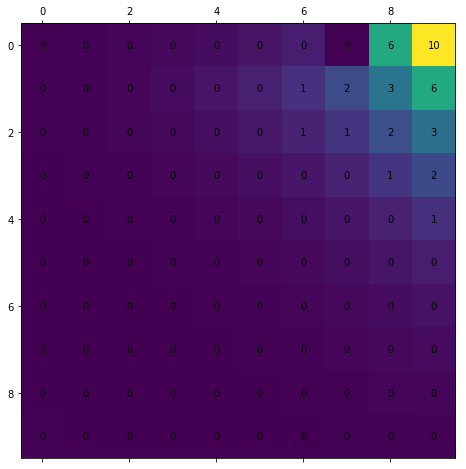

[['➜' '➜' '➜' '➜' '➜' '↓' '↓' '➜' '➜' '➜']
 ['➜' '➜' '➜' '➜' '➜' '➜' '➜' '➜' '➜' '↑']
 ['➜' '➜' '➜' '➜' '➜' '➜' '➜' '➜' '↑' '↑']
 ['➜' '➜' '➜' '➜' '➜' '➜' '➜' '➜' '↑' '↑']
 ['➜' '➜' '➜' '➜' '➜' '➜' '➜' '↑' '↑' '↑']
 ['➜' '➜' '➜' '➜' '➜' '➜' '↑' '↑' '↑' '↑']
 ['↓' '➜' '➜' '➜' '➜' '↑' '↑' '↑' '↑' '↑']
 ['↓' '↓' '➜' '➜' '➜' '↑' '↑' '↑' '↑' '↑']
 ['↓' '←' '←' '➜' '➜' '➜' '↑' '↑' '↑' '↑']
 ['←' '←' '←' '←' '➜' '➜' '➜' '↑' '↑' '↑']]


In [6]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
ax.matshow(JN[k])
for i in range(10):
    for j in range(10):
        c = int(JN[k][j,i])
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.show()

arrow={0:'↑',1:'➜',2:'↓',3:'←'}

# to print the arrows pointing along the optimal actions in that state
arrow_arr=[]
for i in range(actions_arr[k].shape[0]):
    for j in range(actions_arr[k].shape[1]):
        l=actions_arr[k][i][j]
        arrow_arr.append(arrow[l])
        
print(np.array(arrow_arr).reshape(10,10))

In [7]:
df=pd.DataFrame(np.array(arrow_arr).reshape(10,10))
df

,0,1,2,3,4,5,6,7,8,9
0,➜,➜,➜,➜,➜,↓,↓,➜,➜,➜
1,➜,➜,➜,➜,➜,➜,➜,➜,➜,↑
2,➜,➜,➜,➜,➜,➜,➜,➜,↑,↑
3,➜,➜,➜,➜,➜,➜,➜,➜,↑,↑
4,➜,➜,➜,➜,➜,➜,➜,↑,↑,↑
5,➜,➜,➜,➜,➜,➜,↑,↑,↑,↑
6,↓,➜,➜,➜,➜,↑,↑,↑,↑,↑
7,↓,↓,➜,➜,➜,↑,↑,↑,↑,↑
8,↓,←,←,➜,➜,➜,↑,↑,↑,↑
9,←,←,←,←,➜,➜,➜,↑,↑,↑


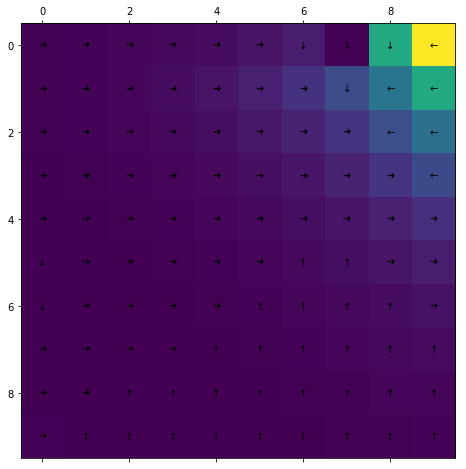

In [8]:
plt.rcParams['figure.figsize'] = [8,8]
fig, ax = plt.subplots()
k=25
act=np.array(arrow_arr).reshape(10,10)
ax.matshow(JN[k])
for i in range(10):
    for j in range(10):
        c = act[i][j]
        ax.text(i, j, str(c), va='center', ha='center')
#plt.imshow(J)
#plt.colorbar()
plt.show()

## Policy Iteration

In [9]:
# transition probabilities
P_ij_A=np.array([[1/2,1/4,1/4],[1/16,3/4,3/16],[1/4,1/8,5/8]])
P_ij_B=np.array([[1/2,0,1/2],[1/16,7/8,1/16]])
P_ij_C=np.array([[1/4,1/4,1/2],[1/8,3/4,1/8],[3/4,1/16,3/16]])

# reward matrix
R_ij_A=np.array([[10,4,8],[8,2,4],[4,6,4]])
R_ij_B=np.array([[14,0,18],[8,16,8]])
R_ij_C=np.array([[10,2,8],[6,4,2],[4,0,8]])

N=20 #horizon length



In [10]:
def find_single_stage_cost(P_ij,g_ij):
    #has to be evaluated for each state
    E_cost=P_ij*g_ij #expected cost of at the current stage for the action
    # will get a matrix which has to be summed over the 
    cost_summed=np.sum(E_cost,axis=1)
    return cost_summed #[cost(action1),cost(action2),cost(action3)]

In [13]:
N=50
J_k_arr=[] # to store the cost to go at each stage
J_N=[0,0,0] #The cost at the Nth stage.
J_k_arr.append(J_N) #array to store J in each stage

g_A=find_single_stage_cost(P_ij_A,R_ij_A)
g_B=find_single_stage_cost(P_ij_B,R_ij_B)
g_C=find_single_stage_cost(P_ij_C,R_ij_C)

beta=0.9
actions_arr=[] #array to store actions optimal actions in each stage for each state
#actions_arr.append([np.argmax(g_A),np.argmax(g_B),np.argmax(g_C)])

for i in range(N):
    #print(J_k_arr[i])
    A_arr=g_A+[beta*np.dot(J_k_arr[i],P_ij_A[0]),beta*np.dot(J_k_arr[i],P_ij_A[1]),beta*np.dot(J_k_arr[i],P_ij_A[2])]
    B_arr=g_B+[beta*np.dot(J_k_arr[i],P_ij_B[0]),beta*np.dot(J_k_arr[i],P_ij_B[1])]
    C_arr=g_C+[beta*np.dot(J_k_arr[i],P_ij_C[0]),beta*np.dot(J_k_arr[i],P_ij_C[1]),beta*np.dot(J_k_arr[i],P_ij_C[2])]
    J_A=np.max(A_arr) #max function over the actions
    action_A=np.argmax(A_arr)
    J_B=np.max(B_arr) #max function over the actions
    action_B=np.argmax(B_arr)
    J_C=np.max(C_arr) #max function over the actions
    action_C=np.argmax(C_arr)
    J_k_arr.append([J_A,J_B,J_C])
    actions_arr.append([action_A,action_B,action_C])
    
print('The cost array (stage wise) is as follows')
print('*'*40)
print(J_k_arr[::-1])
print('*'*40)
print('The optimal actions (stage wise) are as follows')
print('*'*40)
print(actions_arr[::-1])   
print('*'*40)

The cost array (stage wise) is as follows
****************************************
[[120.97463407416097, 134.62743847452768, 122.15806602682369], [120.89920773544624, 134.55201213581293, 122.08263968810894], [120.81540069242988, 134.46820509279655, 121.99883264509259], [120.72228175574502, 134.37508615611171, 121.90571370840773], [120.61881627053963, 134.27162067090632, 121.80224822320233], [120.50385462031137, 134.15665902067809, 121.68728657297409], [120.37611945339113, 134.02892385375782, 121.55955140605384], [120.2341914901464, 133.88699589051311, 121.41762344280912], [120.07649375320784, 133.72929815357452, 121.25992570587056], [119.90127404549831, 133.554078445865, 121.08470599816106], [119.70658548137665, 133.35938988174331, 120.89001743403935], [119.49026485457478, 133.14306925494145, 120.67369680723752], [119.24990860257272, 132.90271300293938, 120.43334055523542], [118.98284610034817, 132.63565050071486, 120.16627805301088], [118.68610998676536, 132.33891438713204, 119.869541